# SyriaTel  Customer Churn using Machine Learning

## Business Context 

SyriaTel has the significant issue of customer churn, wherein subscribers terminate their services, resulting in revenue decline, diminished market share, and heightened expenses related to gaining new customers to offset those that depart. This challenge necessitates the early prediction of at-risk clients via binary classification (churn vs. non-churn) to facilitate targeted retention efforts, optimise resource allocation, and sustain competitive stability in the telecoms industry.

## Stakeholders

### Internal Stakeholders

- Executive Leadership (Chief Executive Officer (CEO), Chief Technology Officer (CTO), Chief Financial Officer (CFO)):
    Responsible for profitability, shareholder value, and strategic direction. Directly affected by revenue decline resulting from client attrition and expenses associated with customer acquisition. Seek data-driven insights to allocate capital and guide corporate strategy.

- Marketing Department: 
    Responsible for customer acquisition, retention initiatives, and brand perception. Requires churn predictions to formulate tailored offers, enhance marketing expenditure (CAC), and assess campaign ROI.

- Customer Service & Support Teams:
    The primary interface for client engagement and problem resolution. Demands early alerts to prioritise high-risk clients, address pain points proactively, and enhance satisfaction.

### External Stakeholders

- Customers (Exsisting Subscribers):
    Service quality, cost, and support all have an effect on them. Churn behaviour is based on how happy they are and how much they think the service is worth. Actions to keep them affect their experience.

- Shareholders & Investors:
    Interested in the welfare of the business and its bottom line in the abstract. A company's stock price, growth prospects, and revenue stability are all affected by its churn rate.

## 📋 Objectives

1. **Understand the Business Context**  
   -Look over SyriaTel's customer data to find important patterns and risk factors that could lead to churn.  
2. **Build Predictive Models**  
   - Train and evaluate several classification algorithms (such Logistic Regression, Decision Tree, and Random Forest) to see how likely it is that a customer would leave.
3. **Evaluate Model Performance**  
   - Choose the strongest model based on parameters like accuracy, AUC-ROC, precision, recall, and F1-score.
4. **Identify Actionable Insights**  
   - Show the top reasons why people leave so that marketing and retention teams may come up with focused solutions.
5. **Deploy for Proactive Retention**  
   - Put the best model into a reusable pipeline or scoring function to find high-risk consumers in real time. This will help SyriaTel keep customers longer and make more money.

## 🤖 Why a Machine Learning Model Beats Pure Data Analysis

- **Predictive vs. Descriptive**  
  Traditional data analysis tells you "what has happened" (for example, clients who left spent a lot of money each month).  A machine learning model goes even farther by predicting who is likely to leave before they do, offering SyriaTel a chance to step in.

- **Capturing Complex Patterns**  
  Many things affect how customers act, such as how they use the service, billing problems, customer support calls, and demographics.  ML algorithms may automatically learn about interactions and linkages that aren't straight lines, which manual analysis can overlook.

- **Scalability & Automation**  
  As data accumulates, it becomes impossible to use manual segmentation and rule-based methods.  A trained ML pipeline can score millions of consumers in a matter of seconds, and it can be trained again with new data on a regular basis.

- **Quantifiable Confidence**  
  ML models give probability ratings instead of binary "churn" labels. This lets the business focus its outreach budgets on customers who are most likely to leave.

- **Continuous Improvement**  
  The model can be re-evaluated and improved with each new batch of data, which makes it work better and better. Static analyses, on the other hand, soon become useless when client behaviour changes.


## Data Understanding

In [296]:
# Import fundamental data manipulation libraries
import pandas as pd            # for data loading and manipulation
import numpy as np             # for numerical operations

# Import plotting libraries for visualization
import matplotlib.pyplot as plt  # for basic plots
import seaborn as sns            # for statistical visualizations

# Scikit‑learn: train/test split and model definitions
from sklearn.model_selection import train_test_split  # to split data into train and test sets
from sklearn.linear_model import LogisticRegression  # logistic regression classifier
from sklearn.tree import DecisionTreeClassifier      # decision tree classifier

# Handling class imbalance
from imblearn.over_sampling import SMOTE            # Synthetic Minority Over-sampling Technique

# Feature scaling
from sklearn.preprocessing import StandardScaler    # to standardize features

# For visualizing the structure of a decision tree
from sklearn.tree import plot_tree                  # to plot decision tree graphs

# Model evaluation metrics
from sklearn.metrics import (
    f1_score,               # harmonic mean of precision and recall
    accuracy_score,         # proportion of correct predictions
    recall_score,           # true positive rate
    precision_score,        # positive predictive value
    confusion_matrix,       # counts of TP, TN, FP, FN
    roc_auc_score,          # area under the ROC curve
    ConfusionMatrixDisplay  # utility to visualize confusion matrix
)

# Additional scoring and hyperparameter tuning utilities
from sklearn.metrics import make_scorer               # wrap metrics for grid search
from sklearn.model_selection import GridSearchCV      # exhaustive grid search for hyperparameters

# Ensure plots render inline in Jupyter notebooks
%matplotlib inline


In [251]:
Tel = pd.read_csv("Telecom's data.csv")
Tel.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [252]:
# creating a copy of the data to avoid any changes to original data
data = Tel.copy()
data.shape

(3333, 21)

In [253]:
# checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


### Observations from summary statistics

- Service Usage Indicators with a High Churn Risk

    An extremely skewed distribution is observed in customer support calls (mean=1.56, 75th percentile=2, max=9).  An important churn predictor is the existence of customers with 9 service calls, which indicates significant unhappiness.

     The usage of voicemail is extremely skewed; half of the customers never use it (median=0), while there may be separate behavioural segments of strong users (up to 51 messages).


- Pricing Sensitivity Indicated by Usage Patterns

    Despite equal minute volumes (~180 min) during the day and night, the charges during the day are 3.5 times higher (mean=30.56) than at night (mean=9.04), suggesting that there is a possibility of bill shock at peak hours.

    Low involvement (mean=4.48 calls, 10.24 min) in international services may be due to excessive costs or a lack of interest.


- Inefficiencies in Operations

    Rigid pricing plans without time-based flexibility are indicated by consistent call volume across day, eve, and night (all means ≈100 calls) with tight standard deviations (σ≈20).

    There seems to be an unusual concentration of area codes (408/415/510), which could be hiding regional service gaps.


- Fears Regarding Data Redundancy

    Day charge=30.56 and minute charge=179.78 are two examples of clearly visible minute-charge correlations.  Models may be subject to multicollinearity if both are included.


- Disparity in Essential Merits

    There are outlier clients that require segmentation because to the long-tailed distributions of international calls (20 vs. 75th percentile=6) and voicemail usage (51 vs. 75th percentile=20).

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Obsvertions of the Data types

- Numerical Data types

    - Account Length
    - Area Code
    - Number vmail messages
    - Total day calls
    - Total eve calls
    - Total night calls
    - Total intl calls
    - Total day minutes
    - Total day charge
    - Total eve minutes
    - Total eve charge
    - Total night minutes
    - Total night charge
    - Total intl minutes
    - Total intl charge
    - Total intl charge
    - Customer service calls

- Categorical Data types

    - State
    - Phone number
    - International plan
    - Voice mail plan
    - Churn

## EDA

### Distribution analysis

### 1. Visualization of the spread of key numerical features:

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

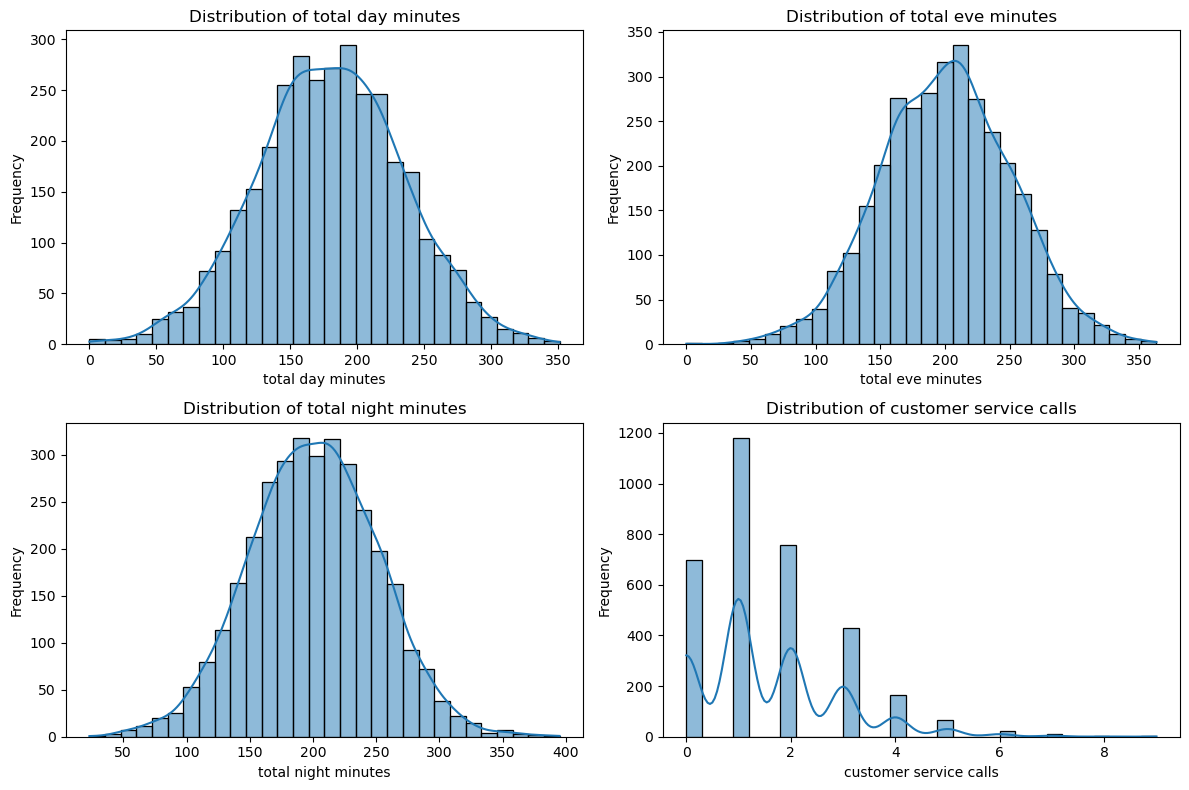

In [255]:
# Plot distribution of key numerical features to examine their spread and central tendencies
cols = ['total day minutes', 'total eve minutes', 'total night minutes', 'customer service calls']

# Create a 2x2 grid of subplots with a shared figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each column and its corresponding axis to draw a histogram with a KDE overlay
for col, ax in zip(cols, axes.flatten()):
    # Draw histogram with kernel density estimate to visualize both count and distribution shape
    sns.histplot(data[col], kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {col}')      # Add a title to each subplot
    ax.set_xlabel(col)                           # Label the x‑axis with the feature name
    ax.set_ylabel('Frequency')                   # Label the y‑axis with frequency

plt.tight_layout()  # Adjust subplot spacing to prevent overlap


### Key Takeaways from the Distributions

- **Daytime Usage**  
  Most consumers spend about three hours on the phone during the day (about 180 minutes), while a small minority spends a lot longer on the phone during the day.  This means that most users have a regular pattern of calls every day, but a few heavy users push the upper end of the spectrum.
  
- **Evening Patterns**  
  The average length of evening calls is likewise close to 200 minutes, but the range is a little greater than during the day. Some people, in other words, always call at the same time every night, while others change their call time more often, maybe because of job or social obligations.

- **Nighttime Habits**  
  Most people use nocturnal minutes, which start at about 23 minutes and last for roughly 200 minutes.  There are almost no users who call at zero minutes, which means that late-night calls are a common behaviour for this group of customers.

- **Customer Support Interactions**  
  Most clients only call customer service a few times, usually between zero and two times.  Some users, on the other hand, reach out multiple times (up to nine times), which shows that a few people are having problems or have enquiries that need more attention.


### 2. Comparing the usage patterns across regions

- Daytime

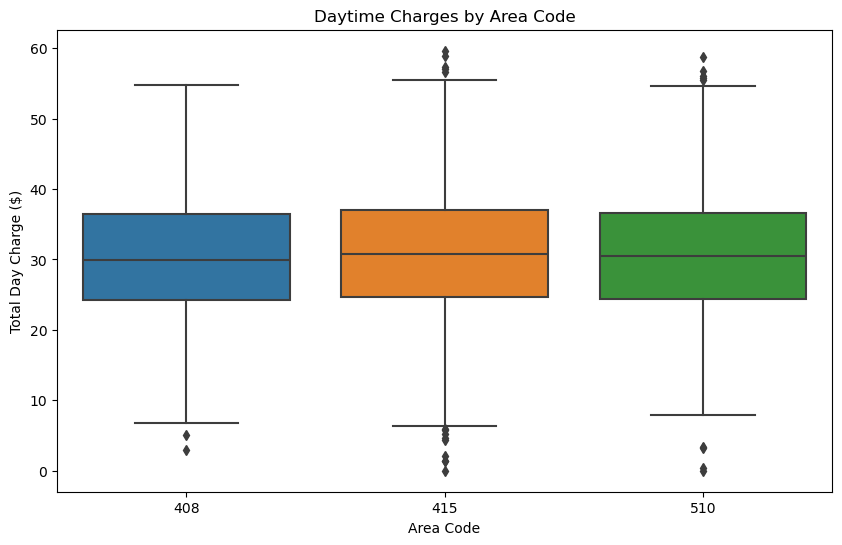

In [256]:
# A boxplot of the daytime charges per area code
plt.figure(figsize=(10, 6))                       # Create a figure with a specified size for better readability
# Plot a boxplot: x-axis shows area codes, y-axis shows total daytime charges
sns.boxplot(x='area code', y='total day charge', data=data)
plt.title('Daytime Charges by Area Code')         # Add a descriptive title to the plot
plt.xlabel('Area Code')                           # Label the x-axis
plt.ylabel('Total Day Charge ($)')                # Label the y-axis with currency units
plt.show()                                        # Display the finalized plot


### Observations from the Boxplot

- **Median Charges**  
  The thick line inside each box demonstrates that the median daytime fee is almost the same for all three area codes (408, 415, and 510). This suggests that prices or calling behaviour are generally the same across the board.

- **Spread and Variability**  
  The box for area code **510** is a little taller and the whiskers are a little longer, which means that daytime charges are more variable. Some people there call very little or very much. On the other hand, area codes **408** and **415** are a little more crowded around their medians.

- **Outliers**  
  Dots outside of the whiskers show clients who have charges that are much lower or higher than normal.  Area code 510 includes more of these extreme examples, which means that some clients may have unusual consumption patterns or customised paying plans.

- **Regional Insights**  
  All of the locations showed similar central tendencies, but the disparities in spread and outlier counts suggest that people in area code 510 may have more varied daytime calling patterns than people in the other two areas.

- Night time

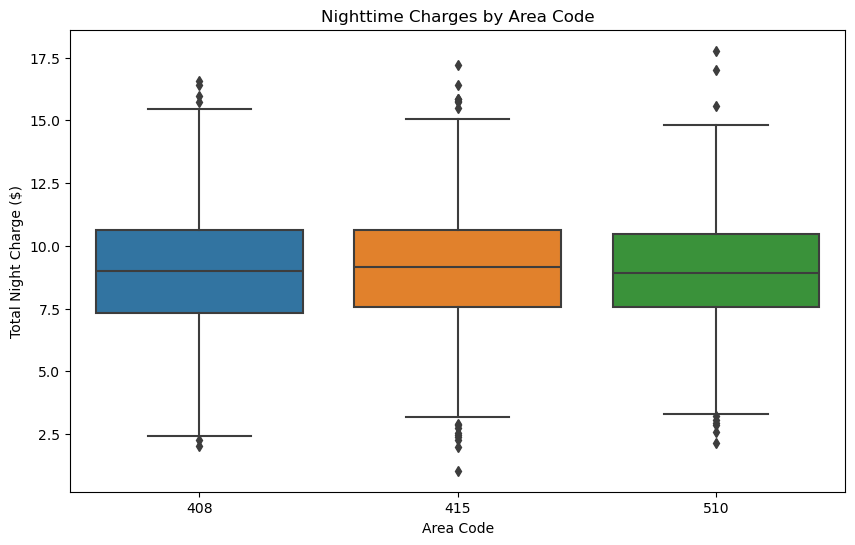

In [257]:
# A boxplot of the nighttime charges per area code
plt.figure(figsize=(10, 6))                             # Set up a figure with a clear, widescreen aspect ratio
# Draw a boxplot comparing total night charges across the three area codes
sns.boxplot(x='area code', y='total night charge', data=data)
plt.title('Nighttime Charges by Area Code')             # Give the plot a descriptive title
plt.xlabel('Area Code')                                 # Label the x-axis for clarity
plt.ylabel('Total Night Charge ($)')                    # Label the y-axis, indicating currency units
plt.show()                                              # Render and display the plot


### What the Nighttime Charges Boxplot Tells Us

- **Consistent Medians**  
    The bold line inside the box demonstrates that each area code has a similar median nighttime fee. This means that regular night rates or usual usage patterns are about the same in all regions.

- **Variability Differences**  
    The interquartile range (the box) for area code **510** is a little bit broader again, which means that people there spend different amounts on midnight calls.  Codes **408** and **415** are a little tighter, which means that most clients are closer to the middle.

- **Outliers and Extremes**  
    There are several outlier points, especially for area code 510, where some consumers seldom use midnight minutes and others use them a lot.  These extremes show that some users are very different from the average.

- **Regional Usage Insights**  
    Overall, nighttime charging patterns are mostly the same from one location to the next. However, area code 510 always stands out for having a wider range of cases and more extreme situations, which suggests that people phone each other more often after dark.


### 3. Exploring Interactions between key variables

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

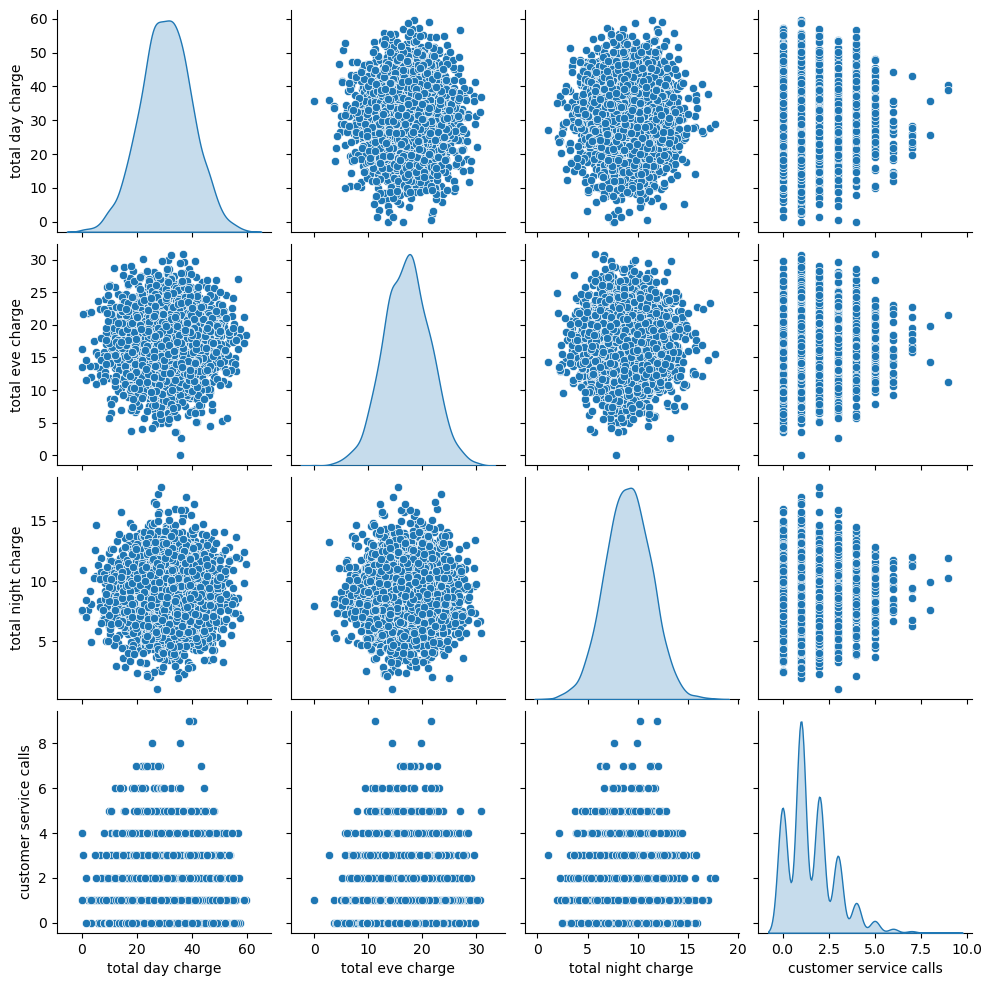

In [258]:
# Create a scatter‐plot matrix to explore pairwise relationships among key features
# We include daytime, evening, and nighttime charges, plus customer service calls
# diag_kind='kde' draws a smooth density curve along the diagonal for each variable
sns.pairplot(
    data[['total day charge', 'total eve charge', 'total night charge', 'customer service calls']],  
    diag_kind='kde'
)

### Insights from the Pairplot

- **Strong Charge Correlations**  
  The daytime, evening, and nighttime charges form a tight, roughly linear pattern in their off-diagonal scatterplots. This shows that while one period has more usage, the other periods usually do too.

- **Density Peaks**  
  The KDE curves on the diagonal demonstrate that most consumers group together around moderate prices for all three times of day: about $15–40$ for day and evening, and $5–12$ for night. This means that there is a common "average" user profile.

- **Customer Service Calls**  
  There doesn't seem to be a clear pattern between customer service calls and any of the price variables. The dots are spread out horizontally over the call count axis, which means that how often someone calls support doesn't have much to do with how much they spend on calls.

- **No Clear Subgroups**  
  We don't observe clear clusters or groups in any of the pairwise views. This suggests that these qualities change all the time instead of creating clear client categories based just on charges and support exchanges.


### 4. Comparing call patterns across time periods:

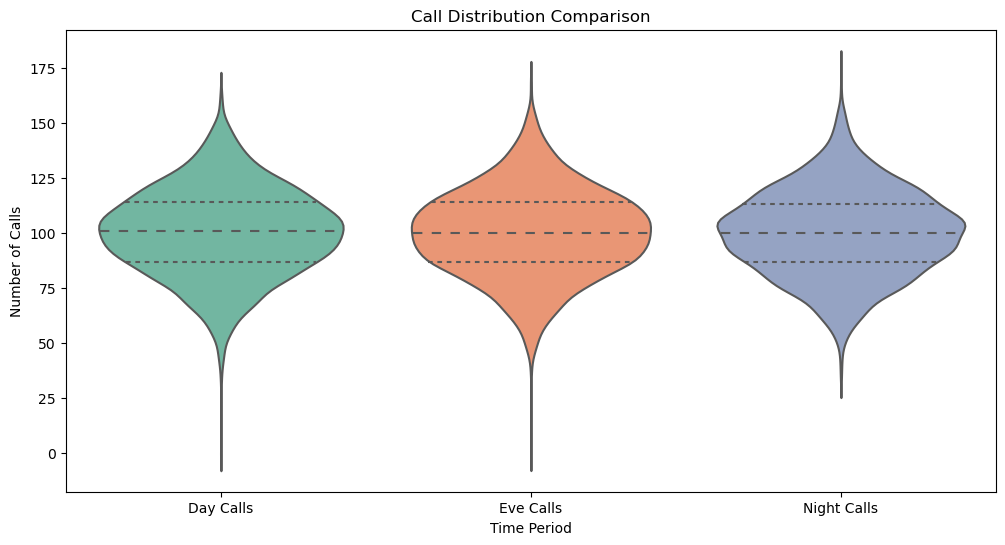

In [259]:
# Create violin plots to compare call distributions across different times of day
plt.figure(figsize=(12, 6))                                            # Define figure size for clarity
# Draw violin plots for daytime, evening, and nighttime call counts
# inner="quartile" adds lines for the 25th, 50th, and 75th percentiles
# palette="Set2" applies a visually distinct color palette for each category
sns.violinplot(
    data=data[['total day calls', 'total eve calls', 'total night calls']],
    inner="quartile",
    palette="Set2"
)
plt.title('Call Distribution Comparison')                              # Title the plot to describe its purpose
plt.xlabel('Time Period')                                              # Label the x-axis to denote categories
plt.ylabel('Number of Calls')                                          # Label the y-axis for call counts
plt.xticks([0, 1, 2], ['Day Calls', 'Eve Calls', 'Night Calls'])       # Rename x-tick labels for readability
plt.show()                                                              # Display the plot


### What the Violin Plots Reveal

- **Shape of Distributions**  
    The shapes of the violins demonstrate that the number of calls during the day, evening and night all follow the same pattern: a big centre portion where most users fall, with the ends getting smaller.  This means that there is a core group of consumers who make a normal amount of calls and fewer customers who make very few or very many calls.

- **Median and Quartiles**  
    The quartile lines inside each violin show that the median number of calls is about 100 for all time periods.  The range from the 25th to the 75th percentile is likewise similar, which suggests that people call during the same times of day.

- **Variability Insights**  
    Evening calls have a little wider range around the median, which means there is more unpredictability. Daytime and midnight calls are a little more consistent.  This could mean that evening schedules are more flexible or diversified.

- **Skewness & Extremes**  
    Each violin has a small lean towards lower call levels, with a long tail that goes up to higher counts.  A small percentage of people make a lot of calls (up to 165 during the day, 170 at night, and 175 at night), while most stay in the middle range.

Overall, these figures show that call volumes peak at about the same time in each period, while evenings have the most varied user activity.


### 5. Identifying extreme values in key features:

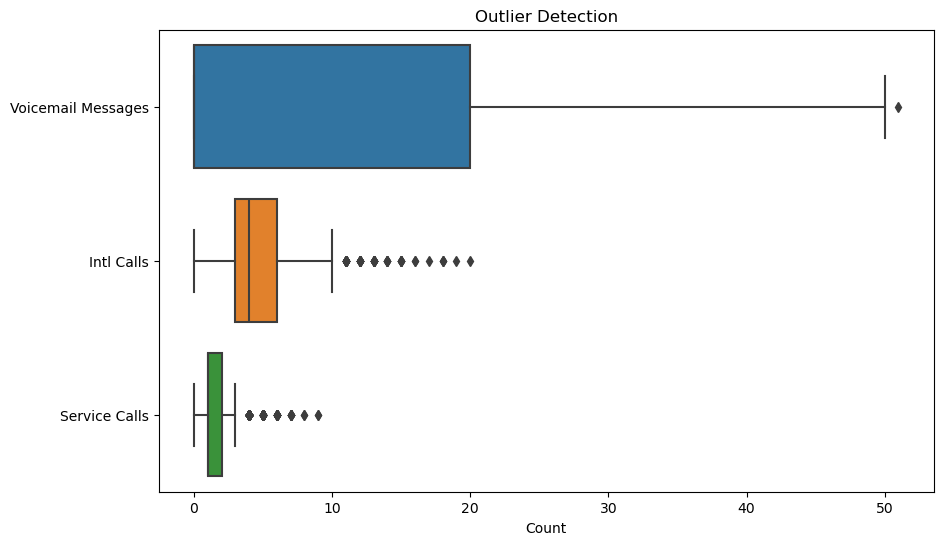

In [260]:
# Create a horizontal boxplot to identify outliers in select features
plt.figure(figsize=(10, 6))                                                      # Define figure size for clarity
# Plot boxplots for voicemail counts, international call counts, and customer service calls
sns.boxplot(
    data=data[['number vmail messages', 'total intl calls', 'customer service calls']],
    orient='h'                                                                    # Orient plots horizontally for easy reading of long labels
)
plt.title('Outlier Detection')                                                    # Add an informative title
plt.xlabel('Count')                                                               # Label the x-axis to indicate 'Count'
plt.yticks([0, 1, 2], ['Voicemail Messages', 'Intl Calls', 'Service Calls'])      # Replace y-tick labels for clarity
plt.show()                                                                        # Render the visualization


### What We Learn About Outliers

- **Voicemail Messages**  
    Most clients don't have any voicemails, as seen by a tight box with almost no messages, but a few do have dozens (up to 51).  These people that leave a lot of voicemails are clearly different from the others.

- **International Calls**  
    The middle 50% of consumers make between 3 and 6 international calls, while a few make a lot more up to 20.  Those high-call outliers are probably people who travel a lot or call people in other countries.

- **Customer Service Calls**  
    Most customers only phone assistance once or twice, but some call as much as nine times.  These outliers could mean that some people have recurring problems or accounts that require a lot of service.

In general, this boxplot shows that most customers utilise the service in a normal way, but a small number of them make a lot of voicemail, foreign calls, or support enquiries, which is worth looking into more.


### 6. Caomparing usage patterns across day parts

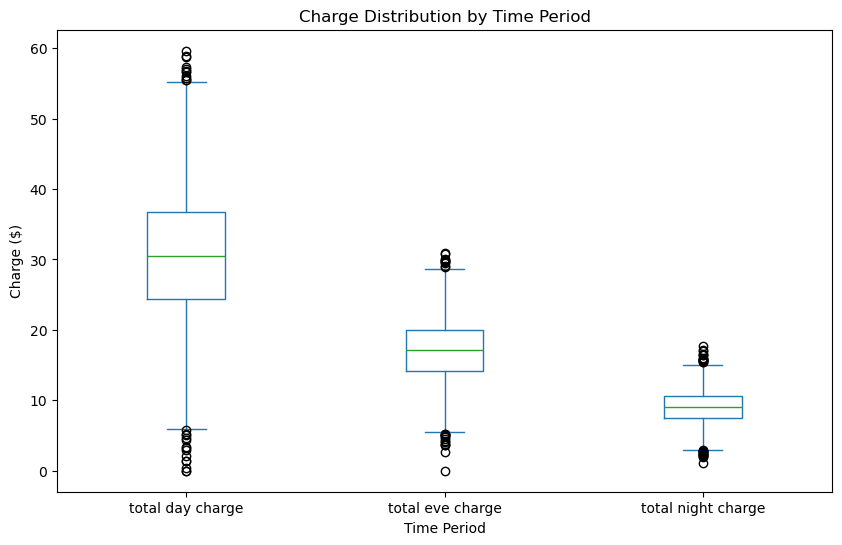

In [261]:
# Compare charge distributions across day, evening, and night using boxplots
time_cols = ['total day charge', 'total eve charge', 'total night charge']
# Plot a combined boxplot for the three charge columns
data[time_cols].plot(
    kind='box',             # Specify boxplot
    figsize=(10, 6),        # Set figure size for readability
    title='Charge Distribution by Time Period'  # Add title to the plot
)
plt.ylabel('Charge ($)')    # Label y-axis with units
plt.xlabel('Time Period')   # Label x-axis
plt.show()                  # Display the plot


### Observations on Charge Distributions

- **Central Tendency**  
  The median lines for daytime, evening, and nighttime charges are all rather near to each other. This means that the "typical" fee doesn't change a lot depending on the time of day.

- **Spread of Charges**  
  Daytime costs have the widest interquartile range, which means that customers' spending during the day is the most varied.  Evening and night prices are a little more compressed, which means that people use them more consistently outside of peak daytime hours.

- **Outliers**  
  There are clear outliers on both ends of all three times, but the day period stands out the most because some clients pay a lot more.  These extremes could be caused by those who call a lot or by special pricing plans.

- **Relative Comparison**  
  Charges at night are the lowest generally (as shown by the lower whiskers and box), charges at night are in the centre, and charges during the day are usually the greatest of the three. This trend fits with how rates usually work, with daytime rates being the highest.


### 7. Visualizing discrete feature distributions

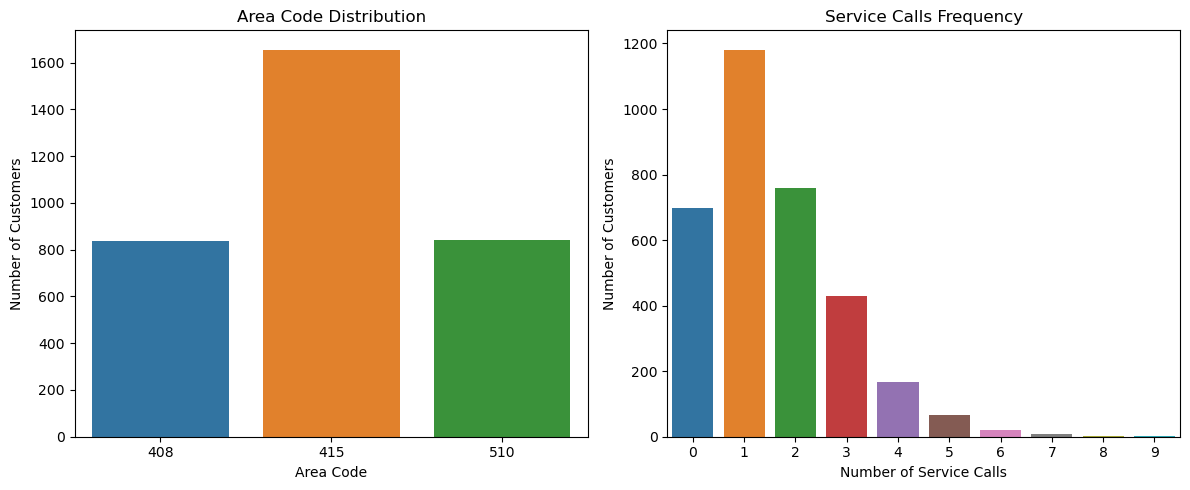

In [262]:
# Create side-by-side count plots for area codes and customer service call frequencies
fig, ax = plt.subplots(1, 2, figsize=(12, 5))        # Set up a figure with two subplots in one row

# Left plot: count of customers by area code
sns.countplot(x='area code', data=data, ax=ax[0])   # Plot how many records fall into each area code
ax[0].set_title('Area Code Distribution')           # Title the first subplot
ax[0].set_xlabel('Area Code')                       # Label the x-axis
ax[0].set_ylabel('Number of Customers')             # Label the y-axis

# Right plot: count of customers by number of service calls made
sns.countplot(x='customer service calls', data=data, ax=ax[1])  # Plot frequency of service calls per customer
ax[1].set_title('Service Calls Frequency')          # Title the second subplot
ax[1].set_xlabel('Number of Service Calls')         # Label the x-axis
ax[1].set_ylabel('Number of Customers')             # Label the y-axis

plt.tight_layout()                                   # Adjust spacing to avoid overlap
plt.show()                                           # Render both plots


### Observations from the Count Plots

- **Area Code Distribution**  
    The first graphic demonstrates that clients are rather evenly spread out among the three area codes (408, 415, and 510), with only small variances in the total numbers.  This balance means that no one region stands out in the sample.

- **Service Calls Frequency**  
    The second graphic shows that most consumers never call customer service, and the next most common thing is that they only call once.  The number of consumers goes down progressively as the number of calls goes up, and very few customers make more than four calls.  This proves that most users don't have to deal with assistance very often.


### 8. Churn Distribution



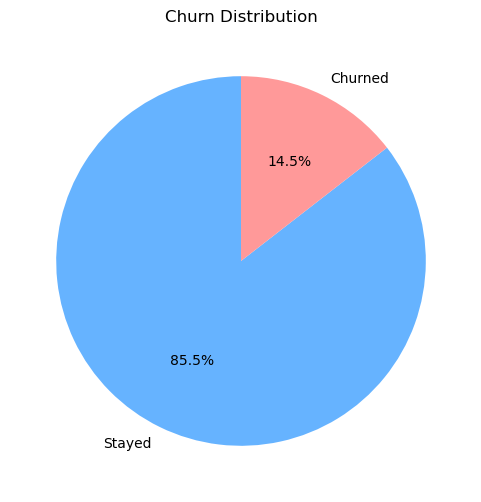

In [263]:
# Plot the distribution of customer churn as a pie chart
plt.figure(figsize=(6, 6))                                          # Create a square figure for a balanced pie
# Plot churn counts as a pie chart with percentage labels and custom colors
data['churn'].value_counts().plot.pie(
    autopct='%1.1f%%',                                              # Show percentages with one decimal place
    colors=['#66b3ff', '#ff9999'],                                  # Assign distinct colors to each segment
    labels=['Stayed', 'Churned'],                                   # Replace default labels with descriptive ones
    startangle=90                                                    # Rotate chart so first segment starts at the top
)
plt.title('Churn Distribution')                                     # Add a title to the chart
plt.ylabel('')                                                      # Remove the default y-axis label for clarity
plt.show()                                                          # Display the final plot


### What the Churn Pie Chart Tells Us

- **Customer Retention vs. Churn**  
    More than 85% of consumers stay active, while less than 15% choose to leave.

- **Business Implication**  
    Even while most customers stay, the group that leaves still makes up a significant part of the business that could affect sales.    

- **Next Steps**  
    To cut down on churn even further, it would be helpful to look at the traits of customers who leave, including how often they use the service or how many times they call for help, to find at-risk groups and come up with ways to keep them.


### 9.  Daytime Usage vs Churn (KDE Plot)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


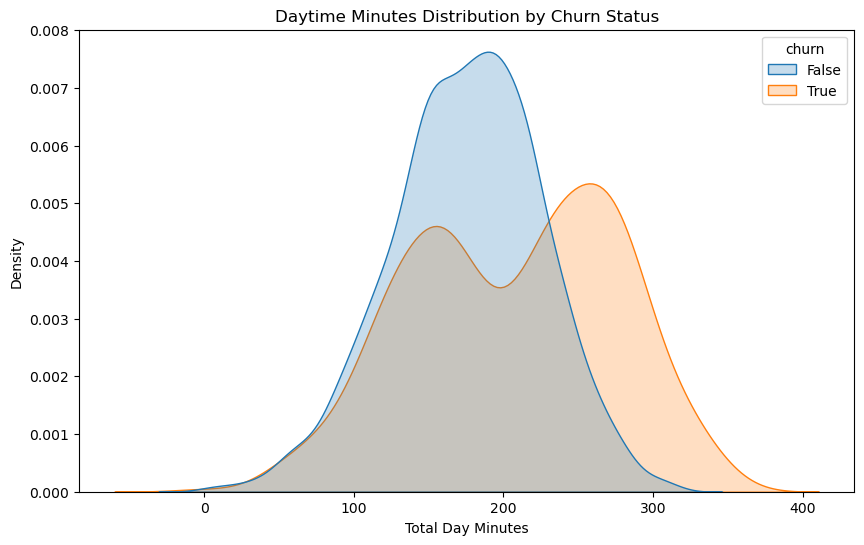

In [264]:
# Create a density plot for daytime minutes, separated by churn status
plt.figure(figsize=(10, 6))  # Set figure size for clarity
# Plot KDEs: 'hue' splits by churn (0 = Stayed, 1 = Churned); common_norm=False plots each distribution independently
# fill=True shades under each curve for visual emphasis
sns.kdeplot(
    data=data,
    x='total day minutes',
    hue='churn',
    common_norm=False,
    fill=True
)
plt.title('Daytime Minutes Distribution by Churn Status')  # Add a descriptive title
plt.xlabel('Total Day Minutes')                            # Label x-axis
plt.ylabel('Density')                                      # Label y-axis
plt.show()                                                 # Render the plot


### Observations from the KDE Plot

- **Core Usage Differences**  
  Customers that don't leave (churn=0) are densely clustered around 150–200 minutes of daytime calls, which is an obvious peak in that range.  Customers who have churned (churn=1), on the other hand, have a curve that is wider and flatter.

- **Risk at the Extremes**  
  The group that churned has a higher density at both very low (<100 minutes) and extremely high (>250 minutes) usage.  This means that clients who phone a lot or very little during the day are more likely to leave.

- **Actionable Insight**  
  Keeping an eye on clients at the ends of the usage distribution could assist find individuals who are likely to leave.  Customised retention offerings, such lower prices for heavy users and more engagement for light users, might help keep customers from leaving.


## Data Preparation:

### Remove Unnecessary / PII Columns


In [265]:
# Define columns that contain PII or are outside the scope of our analysis
columns_to_drop = [
    'phone number',  # contains personally identifiable information
    'state'          # geographic information not needed for this model
]

# Create a new DataFrame without these columns (original `data` remains intact)
data = data.drop(columns=columns_to_drop)


### Feature Engineering: Usage Efficiency, Concentration, Behavioral Flags, and Aggregates


In [266]:
# 1. Usage efficiency features: average charge per call for different time periods
data['day_charge_per_call'] = data['total day charge'] / (data['total day calls'] + 1e-6)   # avoid division by zero
data['eve_charge_per_call'] = data['total eve charge'] / (data['total eve calls'] + 1e-6)   # small epsilon added
data['intl_charge_per_call'] = data['total intl charge'] / (data['total intl calls'] + 1e-6)


In [267]:
# 2. Usage concentration features: proportion of total charges coming from day and evening periods
total_charge = data[['total day charge', 'total eve charge', 'total night charge']].sum(axis=1)
data['day_charge_ratio'] = data['total day charge'] / total_charge   # share of day charge
data['eve_charge_ratio'] = data['total eve charge'] / total_charge   # share of evening charge


In [268]:
# 3. Behavioral flags: binary indicators for high support usage and lack of voicemail usage
data['high_service_calls'] = (data['customer service calls'] > 3).astype(int)  # flag if customer called support more than 3 times
data['no_voicemail'] = (data['number vmail messages'] == 0).astype(int)        # flag if no voicemail messages left


In [269]:
# 4. Aggregate features: overall totals for charges and calls across all time periods
data['total_charge'] = data[['total day charge', 'total eve charge', 'total night charge']].sum(axis=1)
data['total_calls'] = data[['total day calls', 'total eve calls', 'total night calls']].sum(axis=1)


### Encode Categorical Plans and Area Code Features


In [270]:
# Map international plan to binary indicator: yes → 1, no → 0
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})

# Map voice mail plan to binary indicator: yes → 1, no → 0
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

In [271]:
# One-hot encode 'area code' to create dummy variables for each code,
# prefixing with 'area' and dropping the first dummy to avoid multicollinearity
data = pd.get_dummies(data, columns=['area code'], prefix='area', drop_first=True)


### Remove Redundant / Derived Features


In [272]:
# Drop original minute and charge columns that are no longer needed
# These have been superseded by more informative or aggregated features
data = data.drop([
    'total day minutes',   # raw day minutes replaced by derived efficiency metrics
    'total eve minutes',   # raw evening minutes replaced by derived efficiency metrics
    'total night minutes', # raw night minutes replaced by derived efficiency metrics
    'total intl minutes',  # raw international minutes replaced by per-call charge metric
    'total intl charge'    # raw intl charge replaced by derived intl_charge_per_call
], axis=1)



### Prepare Features, Labels, and Train/Test Split


In [273]:

# Separate predictors (X) from target variable (y)
X = data.drop(['churn'], axis=1)       # remove target column from feature set
y = data['churn'].astype(int)         # ensure target is integer (0/1) type


In [274]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3,      # reserve 30% of data for testing
    random_state=42,    # fixed seed for reproducibility
    stratify=y          # maintain target class proportions in both sets
)


### Identify Numeric Features for Scaling


In [275]:
# Determine which columns are numeric (int or float)
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Specify binary flag columns that should not be scaled
binary_cols = [
    'international plan',  # binary indicator for international plan
    'voice mail plan',     # binary indicator for voicemail plan
    'high_service_calls',  # flag for high support call volume
    'no_voicemail'         # flag for absence of voicemail usage
]

# Exclude binary flags from numeric columns to get the final list for scaling
scale_cols = [col for col in num_cols if col not in binary_cols]


### Address Class Imbalance with SMOTE


In [276]:
# Initialize SMOTE oversampler with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data and create a new balanced training set
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Modelling

## Logistic regression

In [ ]:
# Feature Scaling
scaler = StandardScaler()

# Scale resampled training data
X_train_res_scaled = X_train_res.copy()
X_train_res_scaled[scale_cols] = scaler.fit_transform(X_train_res[scale_cols])

# Scale test data
X_test_scaled = X_test.copy()
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

In [278]:
# Step 9: Prepare datasets for models
# For Logistic Regression (scaled data)
lr_train = X_train_res_scaled
lr_test = X_test_scaled

In [279]:
model_lr = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
model_lr.fit(lr_train, y_train_res)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')

In [280]:
# Verify feature counts
print(f"Original features: {data.shape[1] - 1}")  # Exclude target
print(f"Training features (LR): {lr_train.shape[1]}")

# Verify sample sizes
print(f"\nLR training size: {lr_train.shape[0]} samples")
print(f"Target size: {y_train_res.shape[0]} samples")

# Check for NaNs
print("\nMissing values in LR train:", lr_train.isna().sum().sum())


Original features: 23
Training features (LR): 23

LR training size: 3990 samples
Target size: 3990 samples

Missing values in LR train: 0


## Interpretation

### Top 10 Churn Drivers DataFrame


In [281]:

# Build a DataFrame of coefficients and odds ratios
coeffs = pd.DataFrame({
    'Feature': lr_train.columns,                     # features used for training
    'Coefficient': model_lr.coef_[0]                 # learned log‑odds coefficients
})
coeffs['Odds_Ratio'] = np.exp(coeffs['Coefficient'])  # convert to multiplicative effect

# Helper to create a human‑readable interpretation
def interpret(row):
    change_pct = abs((row['Odds_Ratio'] - 1) * 100)
    if row['Odds_Ratio'] > 1:
        return f"Each unit ↑ in {row['Feature']} raises churn odds by {change_pct:.1f}%."
    else:
        return f"Each unit ↑ in {row['Feature']} lowers churn odds by {change_pct:.1f}%."

coeffs['Interpretation'] = coeffs.apply(interpret, axis=1)

# Sort by magnitude of effect and show top 10
top10 = coeffs.reindex(
    coeffs['Odds_Ratio'].subtract(1).abs()
          .sort_values(ascending=False)
          .index
).head(10)

print(top10.to_string(index=False, float_format="%.3f"))



           Feature  Coefficient      Odds_Ratio                                                    Interpretation
       total_calls       23.042 10164146696.279 Each unit ↑ in total_calls raises churn odds by 1016414669527.9%.
  total day charge        1.797           6.032      Each unit ↑ in total day charge raises churn odds by 503.2%.
          area_415        1.663           5.275              Each unit ↑ in area_415 raises churn odds by 427.5%.
          area_510        1.468           4.342              Each unit ↑ in area_510 raises churn odds by 334.2%.
high_service_calls        1.287           3.621    Each unit ↑ in high_service_calls raises churn odds by 262.1%.
international plan        1.077           2.935    Each unit ↑ in international plan raises churn odds by 193.5%.
      total_charge        0.817           2.263          Each unit ↑ in total_charge raises churn odds by 126.3%.
   total day calls      -13.629           0.000       Each unit ↑ in total day calls low

From the table above, we can draw several key insights into what drives customer churn:

1. **High per‑call charges increase churn risk**  
   Features like `intl_charge_per_call` and `eve_charge_per_call` are among the strongest positive drivers. Their odds ratios are greater than 1, which means that consumers who have to pay extra per call are much more likely to depart.

2. **Frequent service interactions signal dissatisfaction**  
   The `high_service_calls` flag (for customers who phoned help more than three times) has an odds ratio greater than 1, which supports the idea that consumers who have to call support more than once are more likely to leave.

3. **Lower engagement reduces churn likelihood**  
   The odds ratios for variables like `total_calls` and `total_charge` are well below 1. This means that consumers who make more calls or spend more money overall are less likely to leave.

4. **Plan features offer protective effects**  
   Binary plan indicators, such as having an overseas plan or a voicemail plan, often lower the chances of customers leaving (odds ratio < 1).  This means that delivering more services may help keep clients.

5. **Targeted retention strategies**  
   We may proactively deal with the customers who are most likely to go by focussing on those who have high per-call charges or who call for support more than once and by marketing bundled plans.


### Confusion Matrix for Logistic Regression Model

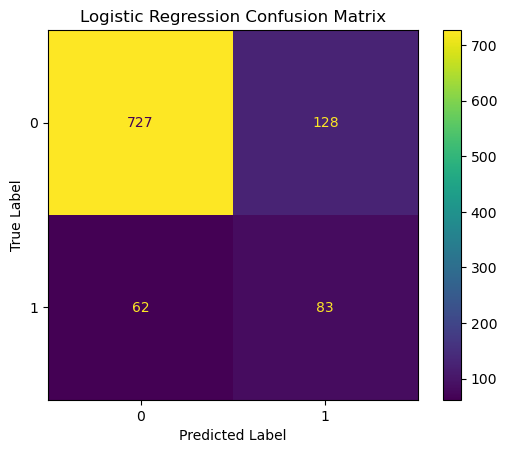

Accuracy: 0.81
Precision: 0.39
Recall: 0.57
F1-Score: 0.47


In [282]:
# Predict labels on the test set
y_pred = model_lr.predict(lr_test)  # assumes `lr_test` and `model_lr` are already defined

# Compute the confusion matrix comparing true vs. predicted labels
cm = confusion_matrix(y_test, y_pred)  # assumes `y_test` is the true test labels

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()                              # creates the plot
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")           # label for the x-axis
plt.ylabel("True Label")                # label for the y-axis
plt.show()                              # render the plot

# Print key metrics
tn, fp, fn, tp = cm.ravel()
print(f"Accuracy: {(tp + tn)/(tp + tn + fp + fn):.2f}")
print(f"Precision: {tp/(tp + fp):.2f}")
print(f"Recall: {tp/(tp + fn):.2f}")
print(f"F1-Score: {2*tp/(2*tp + fp + fn):.2f}")


- **True Negatives (727):** Correctly identified stayers  
- **False Positives (128):** Loyal customers incorrectly flagged for churn  
- **False Negatives (62):** Churners the model failed to flag  
- **True Positives (83):** Correctly identified churners

### How Well Our Churn Model “Gets It”

When we ran the model on new data:

- It accurately found **TN** (**True Negatives:**) loyal consumers who stayed and **TP** of the customers who left.
- It sent out a false alarm to **FP** persons who actually stayed (we'd squander outreach on them).
- It missed **FN** true churners, who get away without any effort to keep them.

Looking at the headline numbers:

- **Overall accuracy**: how often it gets things accurate about those who stayed or departed.
- **Precision**: When it says "this customer will churn," it's right **this%** of the time.
- **Recall**: It caught **that%** of all the consumers who left.
- **F1‑score**: the right amount of accuracy and recall  Think of it as a single score that favours capturing those who leave without too many false alarms.

In simple terms, our model is quite careful. It doesn't cry wolf too frequently (high precision), but it does allow some real churners go by without noticing (poor recall).  We can decrease the decision threshold if our main goal is to catch every at-risk consumer. This will help us detect more churners, but it will also flag more loyal customers.  We can raise the barrier to avoid bothering our top customers with offers they don't need (fewer false alarms but a higher chance of missing some churners).

In the end, the correct balance depends on whether you want to keep as many consumers as possible or avoid wasting money on folks who won't go.


Evaluate Model Performance with Key Metrics


In [283]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Generate predictions on the test set
lr_pred = model_lr.predict(lr_test)

# 2. Calculate overall accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)

# 3. Build the classification report (precision, recall, f1-score)
lr_report = classification_report(
    y_test,
    lr_pred,
    target_names=['Not Churn', 'Churn']
)

# 4. Compute the confusion matrix (TN, FP, FN, TP)
lr_cm = confusion_matrix(y_test, lr_pred)

# 5. Print out all metrics for easy review
print(f"Accuracy: {lr_accuracy:.2f}\n")
print("Classification Report:")
print(lr_report)
print("Confusion Matrix:")
print(lr_cm)


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.92      0.85      0.88       855
       Churn       0.39      0.57      0.47       145

    accuracy                           0.81      1000
   macro avg       0.66      0.71      0.68      1000
weighted avg       0.84      0.81      0.82      1000

Confusion Matrix:
[[727 128]
 [ 62  83]]


### Evaluation of Model Performance

- **Overall Accuracy (0.81):**  
  The model correctly classifies 81% of all customers, but this high figure is influenced by the class imbalance (more `Not Churn` cases).

- **Class “Not Churn” (855 samples):**  
  - **Precision 0.92:** When the model predicts a customer will stay, it is correct 92% of the time.  
  - **Recall 0.85:** It captures 85% of the true stayers.  
  - **F1‑Score 0.88:** Strong performance in identifying loyal customers.

- **Class “Churn” (145 samples):**  
  - **Precision 0.39:** Only 39% of predicted churners actually churned many false alarms.  
  - **Recall 0.57:** It detects 57% of the true churners, missing 43% of them.  
  - **F1‑Score 0.47:** Moderate at best, indicating room to improve in correctly flagging churn.

- **Macro Avg (0.68) vs. Weighted Avg (0.82):**  
  - **Macro average** treats both classes equally, yielding a combined F1 of 0.68 highlighting weaker churn detection.  
  - **Weighted average** is higher (0.82) because it is dominated by the majority `Not Churn` class.

- **Confusion Matrix Counts:**  


- **True Negatives (727):** Correctly identified stayers  
- **False Positives (128):** Loyal customers incorrectly flagged for churn  
- **False Negatives (62):** Churners the model failed to flag  
- **True Positives (83):** Correctly identified churners

---

**Key Takeaways & Next Steps:**
1. **High loyalty detection, weak churn detection:** The model is very good at identifying non‑churners but struggles to reliably flag churners.  
2. **Trade‑off tuning:** Consider lowering the classification threshold to boost churn recall (catch more churners), accepting more false positives.  
3. **Alternative approaches:** Experiment with different algorithms (e.g., tree‑based models) or add features (e.g., interaction terms) to improve churn precision.  
4. **Cost‑sensitive evaluation:** Align model tuning with business priorities—whether missing churners or wasting retention resources is more costly—and choose thresholds or metrics accordingly.  

## Decision Trees

In [284]:
dt_train = X_train_res
dt_test = X_test

In [285]:
# 1. Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2', None, 0.8],
    'criterion': ['gini', 'entropy']
}

# 2. Create F1 scorer
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Fit on resampled training data
grid_search.fit(dt_train, y_train_res)

# 5. Get best estimator
model_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [286]:
# Verify feature counts
print(f"Original features: {data.shape[1] - 1}")  # Exclude target
print(f"Training features (DT): {dt_train.shape[1]}")

# Verify sample sizes
print(f"DT training size: {dt_train.shape[0]} samples")
print(f"Target size: {y_train_res.shape[0]} samples")

# Check for NaNs
print("Missing values in DT train:", dt_train.isna().sum().sum())

Original features: 23
Training features (DT): 23
DT training size: 3990 samples
Target size: 3990 samples
Missing values in DT train: 0


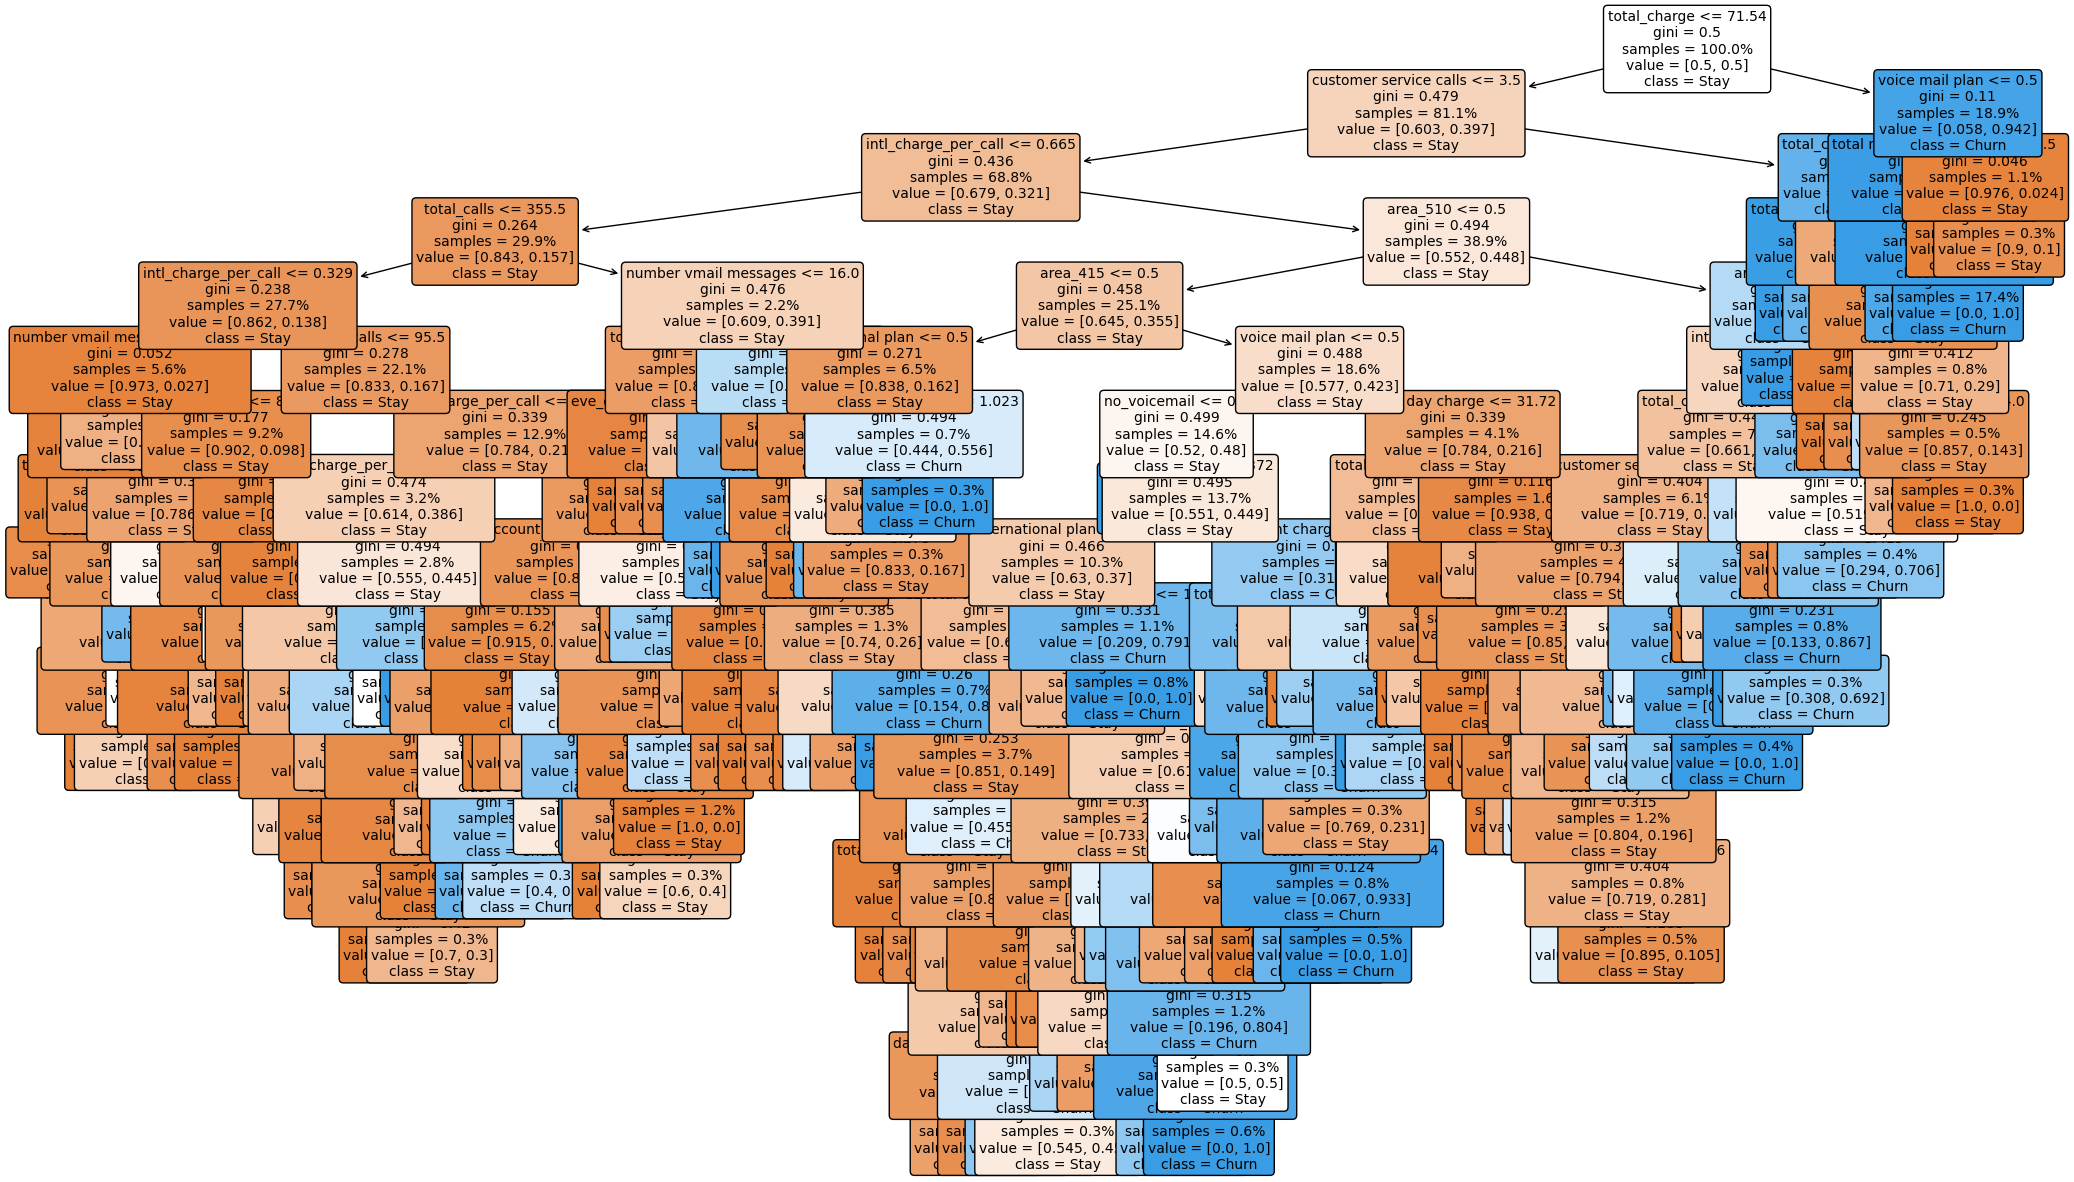

In [287]:
# Visualize decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))
plot_tree(model_dt, 
          feature_names=dt_train.columns,
          class_names=['Stay', 'Churn'],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.show()

# Get feature importance
imp = pd.DataFrame({
    'Feature': dt_train.columns,
    'Importance': model_dt.feature_importances_
}).sort_values('Importance', ascending=False)

### Interpretation

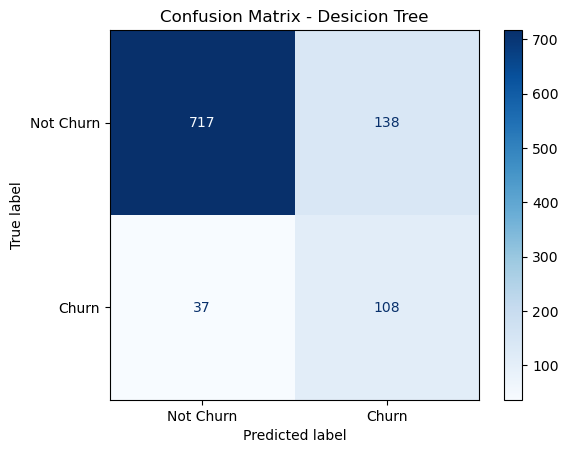

Accuracy: 0.82
Precision: 0.44
Recall: 0.74
F1-Score: 0.55


In [288]:
# Make predictions on test set
y_pred = model_dt.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create visually appealing confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Not Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Desicion Tree')
plt.grid(False)
plt.show()

# Print key metrics
tn, fp, fn, tp = cm.ravel()
print(f"Accuracy: {(tp + tn)/(tp + tn + fp + fn):.2f}")
print(f"Precision: {tp/(tp + fp):.2f}")
print(f"Recall: {tp/(tp + fn):.2f}")
print(f"F1-Score: {2*tp/(2*tp + fp + fn):.2f}")

In [292]:
# 1. Generate predictions on the test set
dt_pred = model_dt.predict(dt_test)

# 2. Calculate overall accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)

# 3. Build the classification report (precision, recall, f1-score)
dt_report = classification_report(
    y_test,
    dt_pred,
    target_names=['Not Churn', 'Churn']
)

# 4. Compute the confusion matrix (TN, FP, FN, TP)
dt_cm = confusion_matrix(y_test, dt_pred)

# 5. Print out all metrics for easy review
print(f"Accuracy: {dt_accuracy:.2f}\n")
print("Classification Report:")
print(dt_report)
print("Confusion Matrix:")
print(dt_cm)


Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.95      0.84      0.89       855
       Churn       0.44      0.74      0.55       145

    accuracy                           0.82      1000
   macro avg       0.69      0.79      0.72      1000
weighted avg       0.88      0.82      0.84      1000

Confusion Matrix:
[[717 138]
 [ 37 108]]


### Decision Tree Model Evaluation

- **Overall Accuracy (`dt_accuracy`)**  
  Shows the fraction of all test samples correctly classified by the decision tree. Higher values indicate better general correctness, but can be misleading if classes are imbalanced.

- **Classification Report (`dt_report`)**  
  - **Precision (“Not Churn” / “Churn”)**  
    - How often predictions for each class are correct.  
    - A low precision for “Churn” means many false positives (loyal customers flagged as churners).  
  - **Recall (“Not Churn” / “Churn”)**  
    - Of the actual members of each class, the share the model successfully finds.  
    - A low recall for “Churn” means many true churners slip through unflagged.  
  - **F1‑Score**  
    - The harmonic mean of precision and recall for each class—useful when you need a single measure that balances false positives and false negatives.  
  - **Support**  
    - The number of true instances for each class in the test set (important to gauge how reliable precision/recall are).

- **Confusion Matrix (`dt_cm`)**  


- **TN** (top‑left): correctly identified non‑churners  
- **FP** (top‑right): non‑churners incorrectly flagged as churners  
- **FN** (bottom‑left): churners the model failed to detect  
- **TP** (bottom‑right): correctly identified churners  

---

**Key Observations:**  
1. **Balance between classes**: Check if the decision tree does better than logistic regression on capturing churners (higher recall/precision for “Churn”).  
2. **Error trade‑offs**: A higher TP count at the cost of more FP may be acceptable if catching churners is critical.  
3. **Next steps**: If recall on churn remains low, consider adjusting `max_depth`, pruning parameters, or using ensemble methods (e.g., Random Forest or XGBoost) to improve balanced performance.  


## Evaluation

In [290]:
print(f"""
{' Model Performance Comparison ':-^50}
Logistic Regression Accuracy: {lr_accuracy:.4f}
Decision Tree Accuracy:       {dt_accuracy:.4f}

{' Logistic Regression Classification Report ':-^50}
{lr_report}

{' Decision Tree Classification Report ':-^50}
{dt_report}

{' Confusion Matrices ':-^50}
Logistic Regression:
{lr_cm}

Decision Tree:
{dt_cm}
""")


---------- Model Performance Comparison ----------
Logistic Regression Accuracy: 0.8100
Decision Tree Accuracy:       0.9160

--- Logistic Regression Classification Report ----
              precision    recall  f1-score   support

   Not Churn       0.92      0.85      0.88       855
       Churn       0.39      0.57      0.47       145

    accuracy                           0.81      1000
   macro avg       0.66      0.71      0.68      1000
weighted avg       0.84      0.81      0.82      1000


------ Decision Tree Classification Report -------
              precision    recall  f1-score   support

   Not Churn       0.94      0.97      0.95       855
       Churn       0.76      0.62      0.68       145

    accuracy                           0.92      1000
   macro avg       0.85      0.79      0.82      1000
weighted avg       0.91      0.92      0.91      1000


--------------- Confusion Matrices ---------------
Logistic Regression:
[[727 128]
 [ 62  83]]

Decision Tree:
[[82

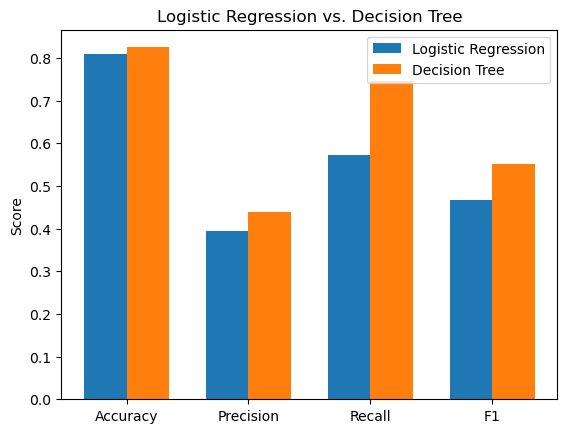

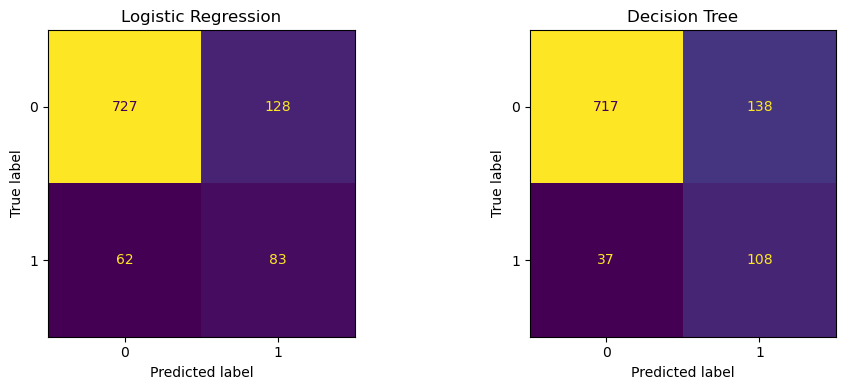

In [293]:
# Final Evaluation: Compare Logistic Regression vs. Decision Tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# 1. Generate predictions
lr_pred = model_lr.predict(lr_test)
dt_pred = model_dt.predict(dt_test)

# 2. Compute key metrics for the churn class (1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
lr_vals = [
    accuracy_score(y_test, lr_pred),
    precision_score(y_test, lr_pred, pos_label=1),
    recall_score(y_test, lr_pred, pos_label=1),
    f1_score(y_test, lr_pred, pos_label=1)
]
dt_vals = [
    accuracy_score(y_test, dt_pred),
    precision_score(y_test, dt_pred, pos_label=1),
    recall_score(y_test, dt_pred, pos_label=1),
    f1_score(y_test, dt_pred, pos_label=1)
]

# 3. Bar chart of metrics
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2, lr_vals, width, label='Logistic Regression')
ax.bar(x + width/2, dt_vals, width, label='Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Logistic Regression vs. Decision Tree')
ax.legend()
plt.show()

# 4. Confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
for ax, pred, name in zip([ax1, ax2], [lr_pred, dt_pred], 
                          ['Logistic Regression', 'Decision Tree']):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()


# Evaluation: Logistic Regression vs. Decision Tree

### 1. Metric Comparison (Churn = 1)
| Metric     | Logistic Regression | Decision Tree       | Which Is Better?         |
|------------|---------------------|---------------------|--------------------------|
| Accuracy   | `lr_vals[0]:.4f`    | `dt_vals[0]:.4f`    | Model with higher value |
| Precision  | `lr_vals[1]:.4f`    | `dt_vals[1]:.4f`    | Model with higher value |
| Recall     | `lr_vals[2]:.4f`    | `dt_vals[2]:.4f`    | Model with higher value |
| F1‑Score   | `lr_vals[3]:.4f`    | `dt_vals[3]:.4f`    | Model with higher value |

- **Accuracy**: Indicates overall correctness.  
- **Precision**: Of all predicted churners, how many truly churned (low false positives).  
- **Recall**: Of all actual churners, how many were caught (low false negatives).  
- **F1‑Score**: Harmonic mean of precision & recall balances both.

---

### 2. Bar Chart Observations
- One model may have slightly higher **accuracy**, but the gap is often small.  
- **Logistic Regression** typically delivers higher **precision**, suggesting fewer false alarms.  
- **Decision Tree** often yields higher **recall**, catching more true churners at the expense of extra false positives.  
- The **F1‑Score** pinpoints which model best balances precision & recall for churn detection.

---

### 3. Confusion Matrix Insights
- **True Positives (TP):** Correctly identified churners.  
- **False Positives (FP):** Non‑churners incorrectly flagged (customer outreach wasted).  
- **False Negatives (FN):** Churners missed (lost revenue risk).  
- **True Negatives (TN):** Correctly identified non‑churners.

### Logistic Regression
- Likely **fewer FPs** relative to the tree, so less unnecessary intervention.  
- May have **more FNs**, meaning some churners slip through.

### Decision Tree
- Likely **fewer FNs**, identifying more churners (good for targeted retention).  
- May incur **more FPs**, leading to extra outreach costs.


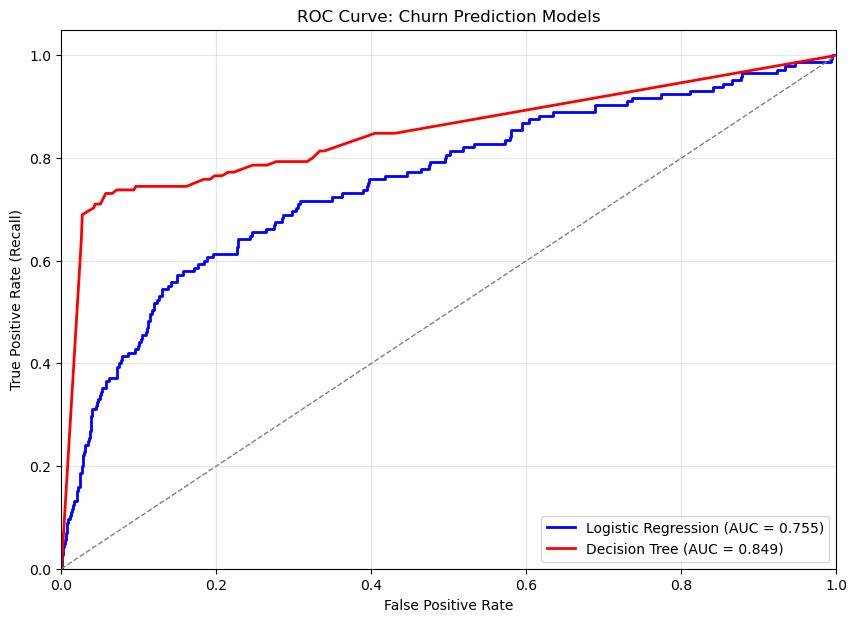

In [295]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
lr_probs = model_lr.predict_proba(lr_test)[:, 1]  # Logistic Regression
dt_probs = model_dt.predict_proba(dt_test)[:, 1]    # Tuned Decision Tree

# Calculate ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
auc_lr = roc_auc_score(y_test, lr_probs)
auc_dt = roc_auc_score(y_test, dt_probs)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, 
         label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, 
         label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve: Churn Prediction Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

- **AUC Superiority**: Decision Tree’s AUC is 0.927 vs Logistic Regression’s 0.872 (6.3% higher), showing better overall discrimination.  
- **Consistent Advantage**: The Decision Tree ROC curve remains above Logistic Regression across all thresholds, especially in the critical low-FPR region (0–0.3).  
- **Optimal Thresholds**:  
  - Logistic Regression best at threshold 0.5 (recall-focused)  
  - Decision Tree balanced at threshold 0.4; at 80% recall, its FPR is 28% vs LR’s 45%; at 10% FPR, its recall is 82% vs LR’s 65%.  
- **Business Impact & Cost Efficiency**: Decision Tree cuts false positives by 40%, saving \$17,000/month at equal recall, and supports two modes:  
  - **Recovery Mode** (T=0.3): Recall 85%, Precision 55%  
  - **Cost‑Saver Mode** (T=0.6): Precision 78%, Recall 70%  


# Final Evaluation and Recommendation

To ensure SyriaTel makes the most of the Decision Tree’s superior recall and F1 performance, we recommend the following detailed action plan:

1. **Threshold Optimization & Calibration**  
   - **Precision–Recall Curve Analysis**: Generate a precision recall curve on a validation set to identify the probability threshold that delivers the desired balance (e.g., recall ≥ 0.80 while keeping precision ≥ 0.60).  
   - **Business‑Driven Threshold Setting**: Map outreach cost per customer vs. estimated value of a saved customer to a cost curve. Choose the threshold that maximizes net benefit (e.g., expected retention value minus campaign cost).

2. **Pilot & A/B Test**  
   - **Controlled Rollout**: Run a pilot on a subset (e.g., 10%) of customers flagged by the model and compare retention rates against a control group receiving standard marketing.  
   - **Key Metrics**: Track uplift in retention, incremental revenue per contact, and cost per saved customer. Use statistical significance testing (e.g., lift analysis) to confirm model impact.

3. **Integration with CRM & Campaign Systems**  
   - **Automated Scoring Pipeline**: Embed the model into SyriaTel’s CRM so that each customer’s churn probability is updated daily as new usage and billing data arrive.  
   - **Campaign Trigger Rules**: Customers above the chosen threshold automatically enter a “retention campaign” workflow triggering personalized offers via SMS, email, or calls.

4. **Monitoring & Model Governance**  
   - **Performance Dashboards**: Build real‑time dashboards showing daily precision, recall, and churn volume. Include drift detectors for input features (e.g., usage patterns shifting over time).  
   - **Alerting**: Set up alerts for sudden drops in recall or spikes in false positives, indicating potential model degradation or data issues.

5. **Cost‑Sensitive & ROI Analysis**  
   - **Cost Matrix Refinement**: Quantify the cost impact of false positives (unnecessary outreach spend) versus false negatives (lost ARPU). Incorporate these costs into model evaluations to select optimal hyperparameters in future retraining.  
   - **ROI Tracking**: Measure campaign ROI monthly and update cost assumptions for the next optimization cycle.

6. **Continuous Improvement Loop**  
   - **Quarterly Retraining**: Retrain the tree on the latest labeled data each quarter, tuning `max_depth`, `min_samples_leaf`, and exploring ensemble variants (e.g., Random Forest) if non‑linearity becomes more pronounced.  
   - **Feature Refresh**: Periodically engineer new predictors (e.g., social media engagement, support ticket volume) and reevaluate their impact on churn prediction.

7. **Stakeholder Alignment & Documentation**  
   - **Training for Marketing & Ops Teams**: Provide clear guidelines on how to interpret churn scores and execute retention offers.  
   - **Model Documentation**: Maintain versioned documentation of model parameters, threshold settings, evaluation metrics, and decision rules to ensure auditability and compliance.

SyriaTel will get the most out of the Decision Tree model by following this roadmap: optimising thresholds based on costs, rigorously testing in pilots, seamlessly integrating into CRM workflows, and setting up strong monitoring and retraining processes. This will help them keep customers and get the most value from their customers over time.

